<a href="https://colab.research.google.com/github/Suhas123556/demo_opensource/blob/master/cars%20csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [20]:
print(df.to_string())

     age  gender  miles   debt  income  sales
0     28       0     23      0    4099    620
1     26       0     27      0    2677   1792
2     30       1     58  41576    6215  27754
3     26       1     25  43172    7626  28256
4     20       1     17   6979    8071   4438
5     58       1     18      0    1262   2102
6     44       1     17    418    7017   8520
7     39       1     28      0    3282    500
8     44       0     24  48724    9980  22997
9     46       1     46  57827    8163  26517
10    34       1     23   2595    7908  14112
11    32       1     23  33119    7261  20956
12    25       0     18   3517    5069   7650
13    35       0     14   1543    1376   3197
14    19       0     22   9362    4218   4531
15    53       1     47   3596   11069  18005
16    57       0     34  58481    7054  22854
17    27       1     33   3410    6755  10278
18    37       1     11      0    2170    739
19    24       0     30   2822    3462   4271
20    44       1     17    247    

In [14]:
df.shape

(963, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     963 non-null    int64
 1   gender  963 non-null    int64
 2   miles   963 non-null    int64
 3   debt    963 non-null    int64
 4   income  963 non-null    int64
 5   sales   963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [16]:
df.isnull().mean()

,0
age,0.0
gender,0.0
miles,0.0
debt,0.0
income,0.0
sales,0.0


In [17]:
df.describe(include='all')

,age,gender,miles,debt,income,sales
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,37.971963,0.512980,27.704050,14109.004154,6176.047767,11689.860852
std,12.290838,0.500091,13.378181,18273.702481,3260.670142,8986.896921
min,19.000000,0.000000,10.000000,0.000000,0.000000,500.000000
25%,27.000000,0.000000,20.000000,1475.000000,3506.500000,3554.000000
50%,37.000000,1.000000,25.000000,6236.000000,6360.000000,9130.000000
75%,49.000000,1.000000,32.000000,16686.000000,8649.500000,19245.000000
max,60.000000,1.000000,97.000000,59770.000000,11970.000000,29926.000000


In [26]:
print(df['gender'].unique())
print(df['miles'].unique())
print(df['debt'].unique())
print(df['income'].unique())

[0 1]
[23 27 58 25 17 18 28 24 46 14 22 47 34 33 11 30 10 15 31 32 29 21 38 16
 20 26 48 35 36 39 42 50 88 80 19 89 41 45 68 49 13 53 12 43 44 75 78 85
 92 51 79 40 93 37 94 84 97 82 95 70 72 67 77 62 87]
[    0 41576 43172  6979   418 48724 57827  2595 33119  3517  1543  9362
  3596 58481  3410  2822   247  7254 41258 43708  8045   263  1971 47277
 59138 56500  9882   751 50167  4342  4133  7134  5503   166  6114  2389
  3899  3992  5110  7375  9592  8590 23918  8020 47753  9310  3001  5044
    72  1123 22992  2398 53432  8549 58742 10293  6551 30534  1383  5397
 16366 54167    73   596 53232    67  5313 50583 55591  5844  2394  4307
 52146   733  6900  1802  7475 51363 11100 45577 56372 40218  5214  5274
 44112 41178  8816  9703  4169 40933 25184 43107 16241 30660  8746  5015
 50310  3212  8017  7730 25462  2014 49859  4829 53965 12650   787  5856
 55494  8801  7205 17091  7530  9898 18335    91   529  9508  1967 57197
   361 42443 38560  5998  8814 45568  2556 50049   465  6827 2011

In [27]:
df.columns

Index(['age', 'gender', 'miles', 'debt', 'income', 'sales'], dtype='object')

/tmp/ipython-input-1123717698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.gender)


<Axes: xlabel='gender', ylabel='Density'>

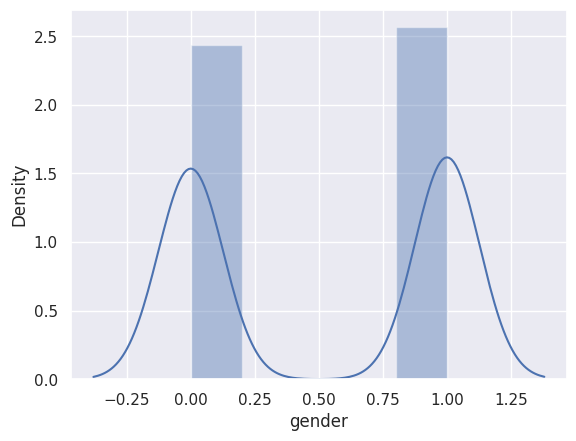

In [30]:
sns.distplot(df.gender)

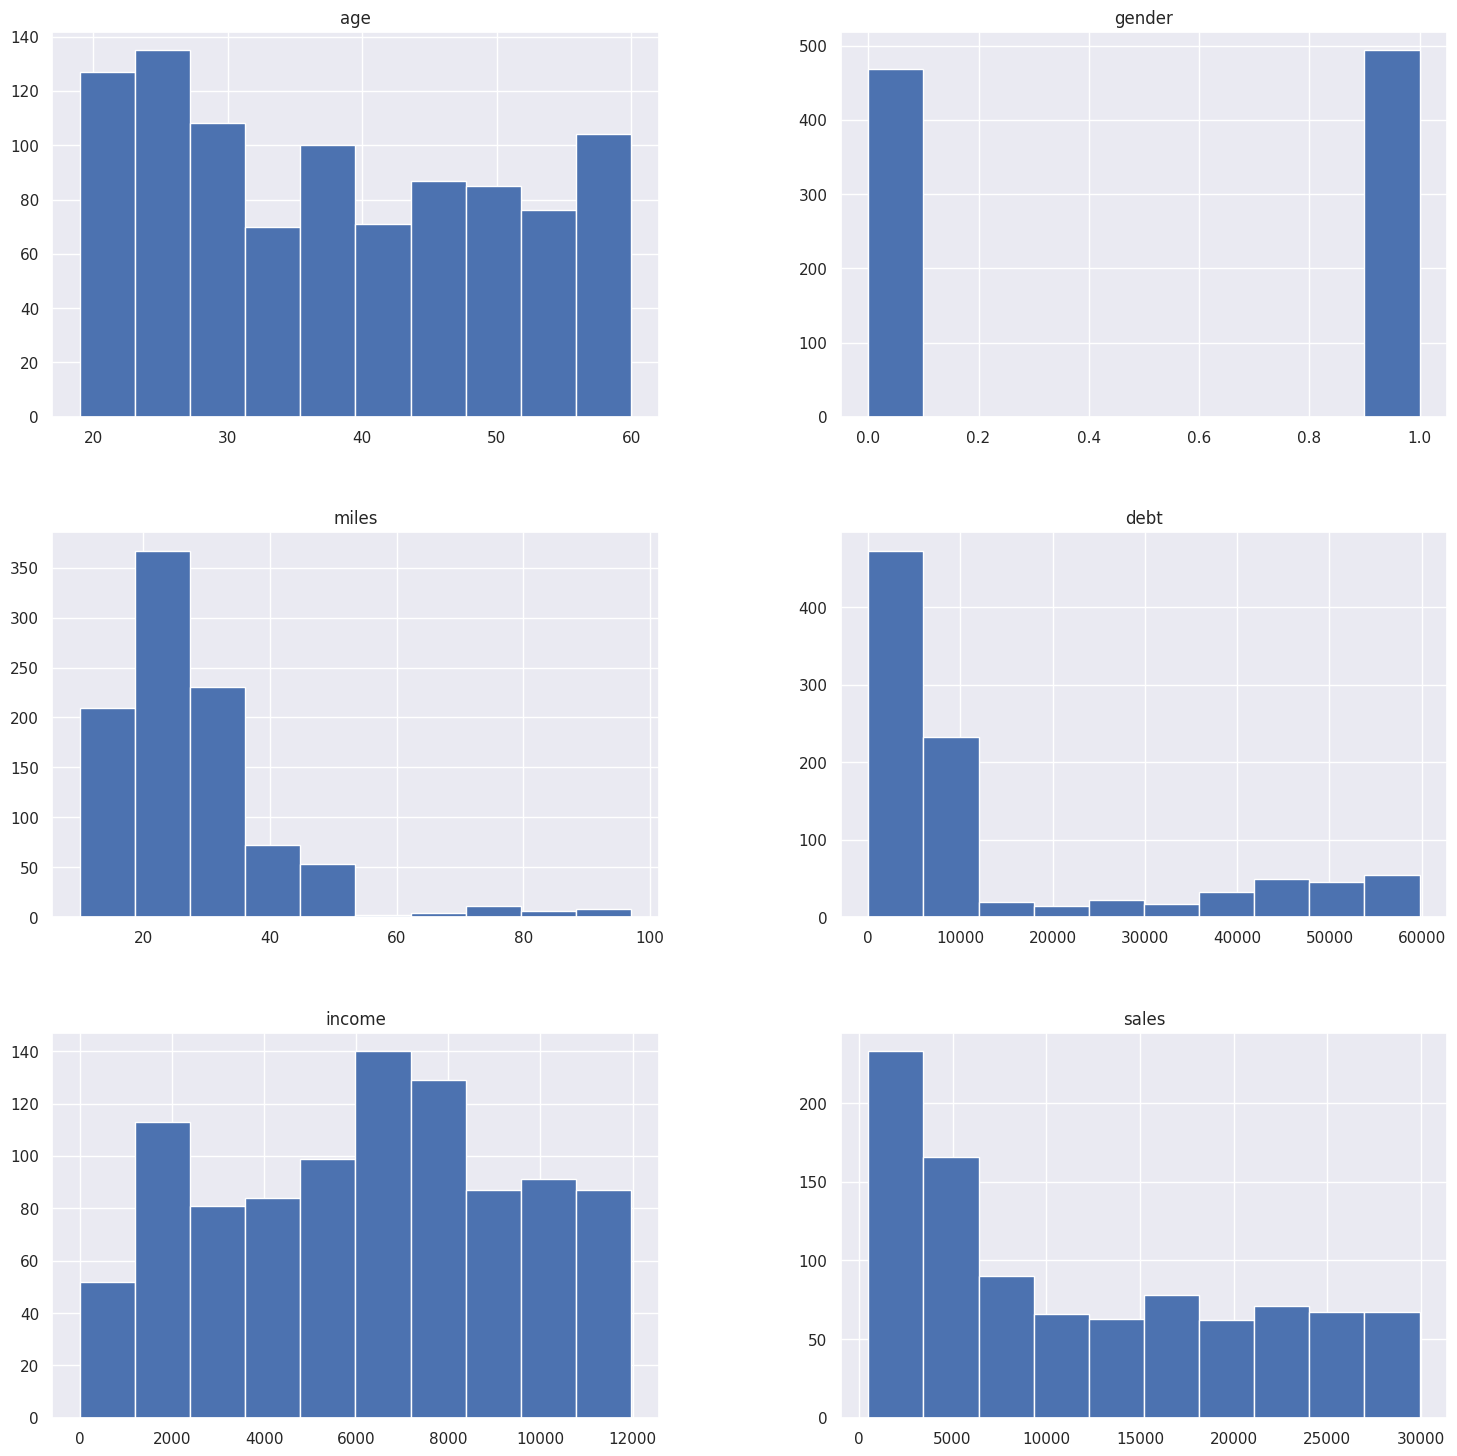

In [31]:
fig = df.hist(figsize=(18,18))